# Welcome to Telco Churn Customers analysis and Prediction
_______________________________________
![](http://dataskunkworks.com/wp-content/uploads/2018/05/churn-1024x482.png)


## Description of dataset
## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

## The data set includes information about:

<b>Customers who left within the last month</b> – the column is called Churn<br>
<b>Services that each customer has signed up for</b> – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
<b>Customer account information</b> – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
<b>Demographic info about customers</b> – gender, age range, and if they have partners and dependents<br><br>
## Inspiration
To explore this type of models and learn more about the subject.
__________________________________

## Objectives:
I will explore the data and try to answer some questions like:
- What's the % of Churn Customers and customers that keep in with the active services.
- We can see different patterns in Churn Customers based on the type of service provided?
- We have difference pattern of churn between genders ?
- What's the difference between customers that pay monthly and by year?
- what's the most profitable service types?
- What's the amount lose in revenue?
- What's the mean age of papeless customers? they are more propense to churn? 
- A lot of other questions that will raise trought the exploration

## After EDA 
I will build a pipeline to find a model that better fits our data.
With the best models I will predict the result and verify the scores of the models. 
<br>
I hope you enjoy the Kernel. <br>



## Importing Libraries

In [1]:
import numpy as np # linear algebra
from scipy import stats # statistic library
import pandas as pd # To table manipulations
import seaborn as sns
import matplotlib.pyplot as plt

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
cufflinks.go_offline(connected=True)

import os

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [2]:
def binary_ploting_distributions(df, cat_col):
    from plotly import tools

    fig = tools.make_subplots(rows=1,
                              cols=2,
                              print_grid=True,
                              horizontal_spacing=0.15, 
                              subplot_titles=("Distribution of and % Churn", 
                                              f'Mean Monthly Charges of {cat_col}') 
                             )

    tmp_churn = df[df['Churn'] == 1]
    tmp_no_churn = df[df['Churn'] == 0]
    tmp_attr = round(tmp_churn[cat_col].value_counts().sort_index() / df_train[cat_col].value_counts().sort_index(),2)*100

    trace1 = go.Bar(
        x=tmp_churn[cat_col].value_counts().sort_index().index,
        y=tmp_churn[cat_col].value_counts().sort_index().values,
        name='Yes_Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[cat_col].value_counts().sort_index().index,
        y=tmp_no_churn[cat_col].value_counts().sort_index().values,
        name='No_Churn', opacity = 0.8, 
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace3 =  go.Scatter(   
        x=tmp_attr.sort_index().index,
        y=tmp_attr.sort_index().values,
        yaxis = 'y2',
        name='% Churn', opacity = 0.6, 
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=2 )
        )
    )

    df_tmp = (df_train.groupby(['Churn', cat_col])['MonthlyCharges'].mean().reset_index())

    tmp_churn = df_tmp[df_tmp['Churn'] == 1]
    tmp_no_churn = df_tmp[df_tmp['Churn'] == 0]

    df_tmp = (df_train.groupby(['Churn', cat_col])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp['diff_rate'] = round((df_tmp[1] / df_tmp[0]) - 1,2) * 100

    trace4 = go.Bar(
        x=tmp_churn[cat_col],
        y=tmp_churn['MonthlyCharges'], showlegend=False,
        name='Mean Charge Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace5 = go.Bar(
        x=tmp_no_churn[cat_col],
        y=tmp_no_churn['MonthlyCharges'],showlegend=False,
        name='Mean Charge NoChurn', opacity = 0.8, 
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace6 =  go.Scatter(   
        x=df_tmp[cat_col],
        y=df_tmp['diff_rate'],
        yaxis = 'y2',
        name='% Diff Churn', opacity = 0.6, 
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=5 )
        )
    )

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 1) 
    fig.append_trace(trace3, 1, 1)
    fig.append_trace(trace4, 1, 2)
    fig.append_trace(trace5, 1, 2)
    fig.append_trace(trace6, 1, 2) 

    fig['data'][2].update(yaxis='y3')
    fig['data'][5].update(yaxis='y4')

    fig['layout']['xaxis'].update(autorange=True,
                                   tickfont=dict(size= 10), 
                                   title= f'{cat_col}', 
                                   type= 'category',
                                  )
    fig['layout']['yaxis'].update(title= 'Count')

    fig['layout']['xaxis2'].update(autorange=True,
                                   tickfont=dict(size= 10), 
                                   title= f'{cat_col}', 
                                   type= 'category',
                                  )
    fig['layout']['yaxis2'].update( title= 'Mean Monthly Charges' )

    fig['layout']['yaxis3']=dict(range= [0, 100], #right y-axis in subplot (1,1)
                              overlaying= 'y', 
                              anchor= 'x', 
                              side= 'right', 
                              showgrid= False, 
                              title= '%Churn Ratio'
                             )

    #Insert a new key, yaxis4, and the associated value:
    fig['layout']['yaxis4']=dict(range= [-20, 100], #right y-axis in the subplot (1,2)
                              overlaying= 'y2', 
                              anchor= 'x2', 
                              side= 'right', 
                              showgrid= False, 
                              title= 'Monhtly % Difference'
                             )
    fig['layout']['title'] = f"{cat_col} Distributions"
    fig['layout']['height'] = 500
    fig['layout']['width'] = 1000

    iplot(fig)
    
def plot_dist_churn(df, col, binary=None):
    tmp_churn = df[df[binary] == 1]
    tmp_no_churn = df[df[binary] == 0]
    tmp_attr = round(tmp_churn[col].value_counts().sort_index() / df[col].value_counts().sort_index(),2)*100
    print(f'Distribution of {col}: ')
    trace1 = go.Bar(
        x=tmp_churn[col].value_counts().sort_index().index,
        y=tmp_churn[col].value_counts().sort_index().values,
        name='Yes_Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[col].value_counts().sort_index().index,
        y=tmp_no_churn[col].value_counts().sort_index().values,
        name='No_Churn', opacity = 0.8, 
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace3 =  go.Scatter(   
        x=tmp_attr.sort_index().index,
        y=tmp_attr.sort_index().values,
        yaxis = 'y2',
        name='% Churn', opacity = 0.6, 
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=2 )
        )
    )
    
    layout = dict(title =  f'Distribution of {str(col)} feature by Target - With Churn Rates',
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [0, 100], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= 'Percentual Churn Ratio'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    iplot(fig)
    
    
def plot_distribution(df, var_select=None, bins=1.0): 
    # Calculate the correlation coefficient between the new variable and the target
    tmp_churn = df[df['Churn'] == 1]
    tmp_no_churn = df[df['Churn'] == 0]    
    corr = df_train['Churn'].corr(df_train[var_select])
    corr = np.round(corr,3)
    tmp1 = tmp_churn[var_select].dropna()
    tmp2 = tmp_no_churn[var_select].dropna()
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_churn', 'No_churn']
    colors = ['seagreen','indianred', ]

    fig = ff.create_distplot(hist_data,
                             group_labels,
                             colors = colors, 
                             show_hist = True,
                             curve_type='kde', 
                             bin_size = bins
                            )
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    iplot(fig, filename = 'Density plot')
    
def monthly_charges(df, col, binary=None):
    #(df_train.groupby(['Churn', 'tenure'])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp = (df_train.groupby([binary, col])['MonthlyCharges'].mean().reset_index())
    
    tmp_churn = df_tmp[df_tmp['Churn'] == 1]
    tmp_no_churn = df_tmp[df_tmp['Churn'] == 0]

    df_tmp = (df_train.groupby([binary, col])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp['diff_rate'] = round((df_tmp[1] / df_tmp[0]) - 1,2) * 100
    
    trace1 = go.Bar(
        x=tmp_churn[col],
        y=tmp_churn['MonthlyCharges'],
        name='Mean Charge\nChurn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[col],
        y=tmp_no_churn['MonthlyCharges'],
        name='Mean Charge No Churn', opacity = 0.8, 
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )
    
    trace3 =  go.Scatter(   
        x=df_tmp[col],
        y=df_tmp['diff_rate'],
        yaxis = 'y2',
        name='% Diff Churn', opacity = 0.6, 
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=5 )
        )
    )
        
    layout = dict(title =  f'Mean Monthly Charges of {str(col)} feature by Churn or Not Churn Customers - With Churn Ratio',
              xaxis=dict(), 
              yaxis=dict(title= 'Mean Monthly Charges'), 
              yaxis2=dict(range= [0, 100], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diff Monthly Charges Mean'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    iplot(fig)

## Importing the dataset

In [3]:
df_train = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2) 

    return summary

In [5]:
resumetable(df_train)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK,3.85
1,gender,object,0,2,Female,Male,Male,0.30
2,SeniorCitizen,int64,0,2,0,0,0,0.19
3,Partner,object,0,2,Yes,No,No,0.30
4,Dependents,object,0,2,No,No,No,0.27
5,tenure,int64,0,73,1,34,2,1.78
6,PhoneService,object,0,2,No,Yes,Yes,0.14
7,MultipleLines,object,0,3,No phone service,No,No,0.41
8,InternetService,object,0,3,DSL,DSL,DSL,0.46
9,OnlineSecurity,object,0,3,No,Yes,Yes,0.45


Very interesting.

- We can see that we have one entry for each CustomerId
- The dataset don't have missing values
- Some features are categorical
- The target the we will use to guide the exploration is Churn

## Let's investigate the data further. 
- I will get all categorical features and see their distribution by the target 
- I will calculate the Churn Rate for each value in categories

In [6]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PaperlessBilling', 'PhoneService', 'Contract', 'StreamingMovies',
                'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity',
                'InternetService', 'MultipleLines', 'DeviceProtection', 'PaymentMethod']

## Understanding the Churn Distribution
- Let's known our target feature

In [7]:
print("CUSTOMERS %CHURN:")
print(round(df_train['Churn'].value_counts(normalize=True) * 100,2))
# df_train.groupby('Churn')['customerID'].count().iplot(kind='bar', title='Churn (Target) Distribution', 
#                                                      xTitle='Customer Churn?', yTitle='Count')

trace0 = go.Bar(
    x=df_train.groupby('Churn')['customerID'].count().index,
    y=df_train.groupby('Churn')['customerID'].count().values,
    marker=dict(
        color=['indianred', 'seagreen']),
)

data = [trace0]
layout = go.Layout(
    title='Churn (Target) Distribution', 
    xaxis=dict(
        title='Customer Churn?'),
    yaxis=dict(
        title='Count')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

CUSTOMERS %CHURN:
No     73.46
Yes    26.54
Name: Churn, dtype: float64


We have 26.5% of our data that is about the Churned customers, and I will try to understand the pattern of these groups<br>
I will filter the dataset and set an dataset for Churn and Non Churn Customers.
- Also, I will see if monthly Charges has some difference to Churn and Non-Churn Customers. <br>
- I have the hipotesis that maybe Churn customers has a highest mean value of no churn customers

## Monthly Charges Distribution
Let's see the distribution of Monthly Charges by Churn and No Churn Customers. 


In [8]:
df_train['TotalCharges'].fillna(df_train['MonthlyCharges'], inplace=True)
df_train['Churn'] = df_train.Churn.replace({'Yes': 1, 'No': 0})
print(f"The mininum value in Monthly Charges is {df_train['MonthlyCharges'].min()} and the maximum is {df_train['MonthlyCharges'].max()}")
print(f"The mean Monthly Charges of Churn Customers is {round(df_train[df_train['Churn'] != 0]['MonthlyCharges'].mean(),2)}\
      \nThe mean Monthly Charges of Non-churn Customers is {round(df_train[df_train['Churn'] == 0]['MonthlyCharges'].mean(),2)}")

plot_distribution(df_train, 'MonthlyCharges', bins=4.0)

The mininum value in Monthly Charges is 18.25 and the maximum is 118.75
The mean Monthly Charges of Churn Customers is 74.44      
The mean Monthly Charges of Non-churn Customers is 61.27


- We can see that monthly Charges have a medium correlation with Churn feature.
- The distribution of Yes and No has clearly different pattern. 

## Ploting all categorical features 

I will plot all categorical features distributions with the % of Churn by each category and the mean and difference of Monhtly charges for each group 

In [9]:
## The inspiration of this view is a Kernel that I saw in Vincent Lugat Kernel 
## I did some modifications but you can see the original on IBM 

for col in cat_features:
    binary_ploting_distributions(df_train, col) 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Analyzing the outputs we can note that:
- Gender,  PhoneService, MultipleLines don't have a clear difference Churn Rates between the values in categories
- The other features seems that could be possible to help algorithmn predict Churn Customers
- The features with the churn ratio values higher or equal to 40%: <br>
-- Internet service<br>
-- online Security<br>
-- online Backup<br>
-- tech support<br>
-- contract<br>
-- seniorcitzen<br>

We can see that in some categories, the churn customers have highest mean of monthly charges.

## Understanding the distribution of Total services provided for each Customer and the Churn % Rate

In [10]:
df_train['internet']= np.where(df_train.InternetService != 'No', 'Yes', 'No')

df_train['num_services'] = (df_train[['PhoneService', 'OnlineSecurity',
                                      'OnlineBackup', 'DeviceProtection', 
                                      'TechSupport', 'StreamingTV', 
                                      'StreamingMovies', 'internet']] == 'Yes').sum(axis=1)

In [11]:
binary_ploting_distributions(df_train, 'num_services') 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



We have 22% of customers with only one service contracted... Of people with 1 service contract, 95% are Phone Service and 5% of total are DSL; 

Altought we have some part of our sample with one service, we can see that people with two services are more propense to left. 

100% of Customers with total of services 2+ has internet (DSL or Fiber)

## Based on Num Services
- I thought in see what's the Contract Type and the Churn distribution by each group

TOTAL NUMBER OF SERVICES BY CONTRACT AND CHURN


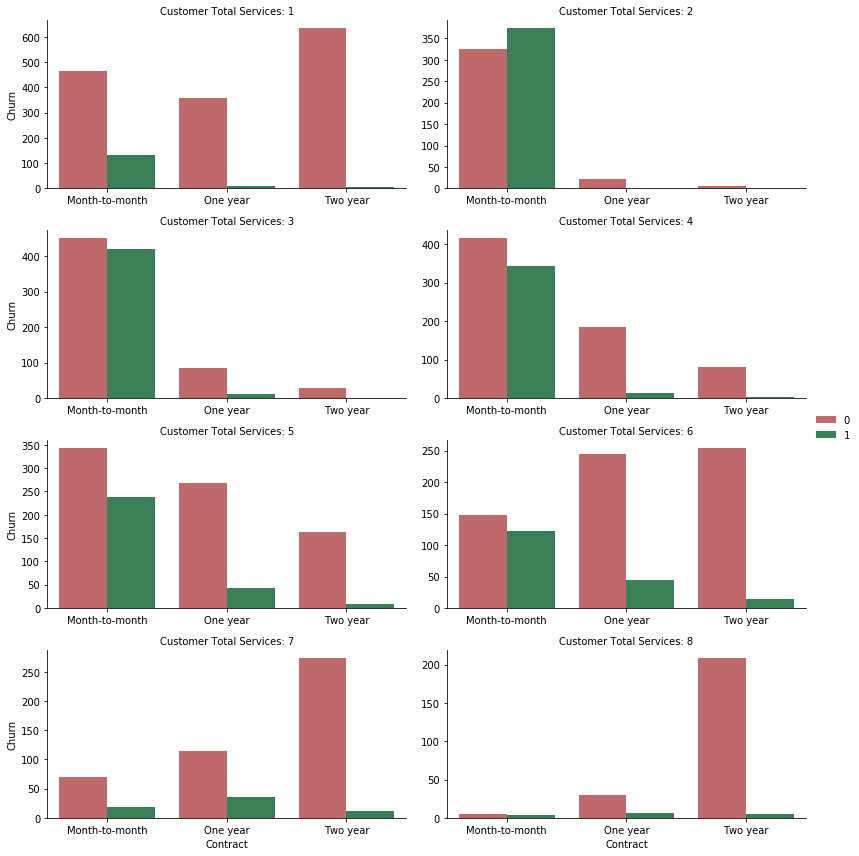

In [12]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs, order=['Month-to-month', 'One year', 'Two year'])

print("TOTAL NUMBER OF SERVICES BY CONTRACT AND CHURN")
grid = sns.FacetGrid(data=df_train,col='num_services', col_wrap=2,
                     aspect=1.9, height=3, sharey=False, sharex=False)
fig = grid.map(countplot,'Contract','Churn', palette=['indianred', 'seagreen'] )
fig.set_titles('Customer Total Services: {col_name}', fontsize=18)
fig.add_legend()

plt.show()

Very cool and meaningful visualization.

We can see difference in Contract feature in different total services that a customer has. 

## Knowning the Numerical Features
- The total features is object because it contains blank space. <br>
- When exploring the dataset, I noted that these values occurs in customers with tenure 0, that don't have generated the first bill.


In [13]:
df_train.loc[df_train['TotalCharges'] == ' ', 'TotalCharges'] = np.nan
df_train['TotalCharges'] = df_train['TotalCharges'].astype(float)

- I will fill this Na's values with zero

## Total of the Monthly Revenue Lose 

In [14]:
print("Total Amount of Monthly Charges by each group: ")
print(round(df_train.groupby('Churn')['MonthlyCharges'].sum() ))

trace0 = go.Bar(
    x=round(df_train.groupby('Churn')['MonthlyCharges'].sum() \
      / df_train.groupby('Churn')['MonthlyCharges'].sum().sum() * 100).index, 
    y=round(df_train.groupby('Churn')['MonthlyCharges'].sum() \
      / df_train.groupby('Churn')['MonthlyCharges'].sum().sum() * 100).values,
    marker=dict(
        color=['indianred', 'seagreen']),
)

data = [trace0]
layout = go.Layout(
    title='Monthly Revenue % Lost by Churn Customer or not', 
    xaxis=dict(
        title='Customer Churn?', type='category'), 
    yaxis=dict(
        title='% of Total Monthly Revenue')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Total Amount of Monthly Charges by each group: 
Churn
0    316986.0
1    139131.0
Name: MonthlyCharges, dtype: float64


We can see that when we consider the amount of customers, the churn represents 26.5% of total customers, but when we consider Monthly Charges we can see that the ratio is 31% of total revenue was "lost" by people who left.

## Distribution of Total Charges
- To better view the Total Charges I will use the log of Total Charges

In [15]:
df_train['TotalCharges_log'] = np.log(df_train['TotalCharges']+1)
print(f"The mininum value in Total Charges is {df_train['TotalCharges'].min()} and the maximum is {df_train['TotalCharges'].max()}")
print(f"The mean Total Charges of Churn Customers is {round(df_train[df_train['Churn'] != 0]['TotalCharges'].mean(),2)}\
      \nThe mean Total Charges of Non-churn Customers is {round(df_train[df_train['Churn'] == 0]['TotalCharges'].mean(),2)}")

plot_distribution(df_train, 'TotalCharges_log', bins=.25)

The mininum value in Total Charges is 18.8 and the maximum is 8684.8
The mean Total Charges of Churn Customers is 1531.8      
The mean Total Charges of Non-churn Customers is 2555.34


We can note that churn customers has lower values in Total Charges.... I think that it's a signal of a different tenure values; <br>
Let's check what tenure feature says.

## Tenure feature
- Let's understand the distribution and churn probabilities by Tenure

In [16]:
print(f"The mininum value in Tenure is {df_train['tenure'].min()} and the maximum is {df_train['tenure'].max()}")
print(f"The mean Tenure of Churn Customers is {round(df_train[df_train['Churn'] != 0]['tenure'].mean())}\
      \nThe mean Tenure of Non-churn Customers is {round(df_train[df_train['Churn'] == 0]['tenure'].mean())}")

plot_dist_churn(df_train, 'tenure', 'Churn')

The mininum value in Tenure is 0 and the maximum is 72
The mean Tenure of Churn Customers is 18      
The mean Tenure of Non-churn Customers is 38
Distribution of tenure: 


We can see that the mean of two groups has different... To afirm it, we need to do a statistc test, but it's a very insightful visualization.

## Mean Monthly Charges by tenure with Churn Rate of tenure values

In [17]:
print("MEAN MONTHLY CHARGES OF TENURE FOR CHURN OR NO CHURN CUSTOMERS")
    
monthly_charges(df_train, 'tenure', 'Churn')

MEAN MONTHLY CHARGES OF TENURE FOR CHURN OR NO CHURN CUSTOMERS


Very insightful. The mean of Monthly Charges and the difference Churn Customer is highest in Churn Customers. 
we can see that in tenure 45 months, is the unique 


## The Average Monthly Charges by Total Number of Services Contracted


In [18]:
monthly_charges(df_train, 'num_services', 'Churn') 


Nice! We can see that to customers that has only Phone Services we cannot see difference in average monthly charges. <br>
In customers with two or more services we can see difference in Average Monthly Charges of Churn Customers to Customers who keep the services

## Knowing Tenure by Total Charges for each Target value

In [19]:
tmp_churn = df_train[df_train['Churn'] == 1]
tmp_no_churn = df_train[df_train['Churn'] == 0]

tmp_churn_fiber = tmp_churn[tmp_churn['InternetService'] == 'Fiber optic']
tmp_churn_dsl = tmp_churn[tmp_churn['InternetService'] == 'DSL']
tmp_churn_no = tmp_churn[tmp_churn['InternetService'] == 'No']

tmp_no_churn_fiber = tmp_no_churn[tmp_no_churn['InternetService'] == 'Fiber optic']
tmp_no_churn_dsl = tmp_no_churn[tmp_no_churn['InternetService'] == 'DSL']
tmp_no_churn_no = tmp_no_churn[tmp_no_churn['InternetService'] == 'No']

# Create traces
trace0 = go.Scatter(
    x = tmp_churn_fiber['tenure'],
    y = tmp_churn_fiber['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'Churn - Fiber', marker=dict(
        color='indianred', symbol='star'
))
trace1 = go.Scatter(
    x = tmp_churn_dsl['tenure'],
    y = tmp_churn_dsl['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'Churn - DSL', marker=dict(
        color='indianred', symbol='square'
))
trace2 = go.Scatter(
    x = tmp_churn_no['tenure'],
    y = tmp_churn_no['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'Churn - No', marker=dict(
        color='indianred', symbol='circle'
))

# Create traces
trace3 = go.Scatter(
    x = tmp_no_churn_fiber['tenure'],
    y = tmp_no_churn_fiber['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'No-Churn-Fiber', marker=dict(
        color='seagreen', symbol='star'
))
trace4 = go.Scatter(
    x = tmp_no_churn_dsl['tenure'],
    y = tmp_no_churn_dsl['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'No-Churn-DSL', marker=dict(
        color='seagreen', symbol='square'
))
trace5 = go.Scatter(
    x = tmp_no_churn_no['tenure'],
    y = tmp_no_churn_no['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'No-Churn-No', marker=dict(
        color='seagreen', symbol='circle'
))

layout = dict(title ='Dispersion of Total Charges explained by Monthly Charges by Target',
              xaxis=dict(title='Internet Service Types'), 
              yaxis=dict(title= 'Monthly Charges'))

fig = go.Figure(data = [trace0, trace3, trace1, trace4, trace2, trace5], layout=layout)
iplot(fig)

We can clearly see a "linear function" where the two features are very correlated and it that make a lot of sense. <br>
I tought that could be interesting if we divide the Total charges by the Monthly Charges and we will get the months till the Churn... It would be very close value of tenure

In [20]:
df_train['assign_months'] = round(df_train['TotalCharges'] / df_train['MonthlyCharges'],0)

In [21]:
print("Comparing Tenure and Assign Months")
pd.concat([df_train['assign_months'].describe().reset_index(),
           df_train['tenure'].describe().reset_index()['tenure']], axis=1)

Comparing Tenure and Assign Months


,index,assign_months,tenure
0,count,7032.000000,7043.000000
1,mean,32.418658,32.371149
2,std,24.582665,24.559481
3,min,1.000000,0.000000
4,25%,9.000000,9.000000
5,50%,29.000000,29.000000
6,75%,55.000000,55.000000
7,max,79.000000,72.000000


Cool.
As we can see, the both features shows the same information, so I will drop the new features that I created

In [22]:
df_train.drop('assign_months', axis=1, inplace=True)

## Mean Monthly Charges by Categorical Features and the Diff Ratio of Charges

## Let's see the Ratio of Revenue lost by some interesting Features
- This charts shows the 

In [23]:
color_op = ['#5527A0', '#BB93D7', '#834CF7', '#6C941E', '#93EAEA', '#7425FF', '#F2098A', '#7E87AC', 
            '#EBE36F', '#7FD394', '#49C35D', '#3058EE', '#44FDCF', '#A38F85', '#C4CEE0', '#B63A05', 
            '#4856BF', '#F0DB1B', '#9FDBD9', '#B123AC']

def PieChart(df_cat, df_value, title, limit=15):
    """
    This function helps to investigate the proportion of metrics of toxicity and other values
    """

    # count_trace = df_train[df_cat].value_counts()[:limit].to_frame().reset_index()
    tmp_churn = df_train[df_train['Churn'] == 1].groupby(df_cat)[df_value].sum().nlargest(limit).to_frame().reset_index()
    tmp_no_churn = df_train[df_train['Churn'] == 0].groupby(df_cat)[df_value].sum().nlargest(limit).to_frame().reset_index()

    trace1 = go.Pie(labels=tmp_no_churn[df_cat], 
                    values=tmp_no_churn[df_value], name= "No-Churn", hole= .5, 
                    hoverinfo="label+percent+name+value", showlegend=True,
                    domain= {'x': [0, .48]})

    trace2 = go.Pie(labels=tmp_churn[df_cat], 
                    values=tmp_churn[df_value], name="Churn", hole= .5, 
                    hoverinfo="label+percent+name+value", showlegend=False, 
                    domain= {'x': [.52, 1]})

    layout = dict(title= title, height=450, font=dict(size=15),
                  annotations = [
                      dict(
                          x=.20, y=.5,
                          text='No Churn', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Churn', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    iplot(fig)

## %Ratio of Monthly Charges by Internet Service
For instance:<br>
Optical fiber is responsible for 53% (168,99k) of the monthly revenue, DSL 37% (118,14k) and 9% of customers don't have 

In [24]:
no_churn_monthly_renenue = tmp_no_churn['MonthlyCharges'].sum()

In [25]:
PieChart("InternetService", 'MonthlyCharges', "Internet Services Total Charges by Churn", limit=10)


## %Ratio of Monthly Charges by Contract types 

In [26]:
PieChart("Contract", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

Nice. 87% of all monthly revenue lost are caused by customers with Month-to-Month Contracts
- As we can see in some graphs, Contract has a lot of informations about the Churn and it could help us to predict. 

## %Ratio of Monthly Charges by Multiple Lines

In [27]:
PieChart("MultipleLines", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

## %Ratio of Monthly Charges by Device Protection

In [28]:
PieChart("DeviceProtection", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

## %Ratio of Monthly Charges by Tech Support

In [29]:
PieChart("TechSupport", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

## %Ratio of Monthly Charges by Online Backup


In [30]:
PieChart("OnlineBackup", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

## %Ratio of Monthly Charges by Online Security

In [31]:
PieChart("OnlineSecurity", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

## Based on the plots, let's create some binary features and see the distributions again

## Feature engineering and preprocessing

In [32]:
Id_col     = ['customerID']

target_col = ["Churn"]

cat_cols   = df_train.nunique()[df_train.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
binary_cols   = df_train.nunique()[df_train.nunique() == 2].keys().tolist()

multi_cols = [i for i in cat_cols if i not in binary_cols]

## Feature Engineering

In [33]:
df_train.loc[:,'Engaged'] = np.where(df_train['Contract'] != 'Month-to-month', 1,0)
df_train.loc[:,'YandNotE'] = np.where((df_train['SeniorCitizen']==0) & (df_train['Engaged']==0), 1,0)
df_train.loc[:,'ElectCheck'] = np.where((df_train['PaymentMethod'] == 'Electronic check') & (df_train['Engaged']==0), 1,0)
df_train.loc[:,'fiberopt'] = np.where((df_train['InternetService'] != 'Fiber optic'), 1,0)
df_train.loc[:,'StreamNoInt'] = np.where((df_train['StreamingTV'] != 'No internet service'), 1,0)
df_train.loc[:,'NoProt'] = np.where((df_train['OnlineBackup'] != 'No') |\
                                    (df_train['DeviceProtection'] != 'No') |\
                                    (df_train['TechSupport'] != 'No'), 1,0)

df_train['TotalServices'] = (df_train[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [34]:
from sklearn.preprocessing import LabelEncoder

#Label encoding Binary columns
le = LabelEncoder()

tmp_churn = df_train[df_train['Churn'] == 1]
tmp_no_churn = df_train[df_train['Churn'] == 0]

bi_cs = df_train.nunique()[df_train.nunique() == 2].keys()
dat_rad = df_train[bi_cs]

for cols in bi_cs :
    tmp_churn[cols] = le.fit_transform(tmp_churn[cols])
    

data_frame_x = tmp_churn[bi_cs].sum().reset_index()
data_frame_x.columns  = ["feature","yes"]
data_frame_x["no"]    = tmp_churn.shape[0]  - data_frame_x["yes"]
data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

#count of 1's(yes)
trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(), 
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "Churn 1's",
                         mode = "markers+lines", visible=True,
                         marker = dict(size = 5)
                        )

#count of 0's(No)
trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "Churn 0's",
                         mode = "markers+lines", visible=True,
                         marker = dict(size = 5)
                        ) 
for cols in bi_cs :
    tmp_no_churn[cols] = le.fit_transform(tmp_no_churn[cols])
    
data_frame_x = tmp_no_churn[bi_cs].sum().reset_index()
data_frame_x.columns  = ["feature","yes"]
data_frame_x["no"]    = tmp_no_churn.shape[0]  - data_frame_x["yes"]
data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

#count of 1's(yes)
trace3 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "NoChurn 1's",
                         mode = "markers+lines", visible=False,
                         marker = dict(size = 5)
                        )

#count of 0's(No)
trace4 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "NoChurn 0's",
                         mode = "markers+lines", visible=False,
                         marker = dict(size = 5)
                        ) 

data = [trace1, trace2, trace3, trace4]

updatemenus = list([
    dict(active=0,
         x=-0.15,
         buttons=list([  
            dict(
                label = 'Churn Dist',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]}, 
                     {'title': 'Customer Churn Binary Counting Distribution'}]),
             
             dict(
                  label = 'No-Churn Dist',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                     {'title': 'No Customer Churn Binary Counting Distribution'}]),

        ]),
    )
])

layout = dict(title='ScatterPolar Distribution of Churn and Non-Churn Customers (Select from Dropdown)', 
              showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)

iplot(fig)

Nice, we can easily access a lot of information about our customers.


# Creating new numerical columns

In [35]:
multi_cols.remove('Contract')
df_train['monthly_diff_mean'] = df_train['MonthlyCharges'] / df_train['MonthlyCharges'].mean() 
for cat in cat_cols:
    df_train[str(cat)+'_diff_mean'] = df_train['MonthlyCharges'] / df_train.groupby(['Contract',cat])['MonthlyCharges'].transform('mean')
    df_train[str(cat)+'_diff_std'] = df_train['MonthlyCharges'] / df_train.groupby(['Contract',cat])['MonthlyCharges'].transform('std')

## Encoding and binarizing features

In [36]:
for cols in binary_cols :
    df_train[cols] = le.fit_transform(df_train[cols])
    
#Duplicating columns for multi value columns
df_train = pd.get_dummies(data = df_train,columns = multi_cols )

df_train.drop("Contract", axis=1, inplace=True)

In [37]:
num_cols   = [x for x in df_train.columns if x not in cat_cols + target_col + Id_col]

from sklearn.preprocessing import StandardScaler
df_train.fillna(-99, inplace=True)
#Scaling Numerical columns
ss = StandardScaler()
scl = ss.fit_transform(df_train[num_cols])
scl = pd.DataFrame(scl, columns=num_cols)

#dropping original values merging scaled values for numerical columns
# df_data_og = df_train.copy()

df_train = df_train.drop(columns = num_cols,axis = 1)
df_train = df_train.merge(scl, left_index=True, right_index=True, how = "left")

## Feature Selection
- Let's use the correlation to drop features high correlation

In [38]:
# Threshold for removing correlated variables
threshold = 0.90

# Absolute value correlation matrix
corr_matrix = df_train.corr().abs()

# Getting the upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [39]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(list(to_drop))

There are 38 columns to remove.
['StreamNoInt', 'monthly_diff_mean', 'gender_diff_mean', 'gender_diff_std', 'SeniorCitizen_diff_mean', 'SeniorCitizen_diff_std', 'Partner_diff_mean', 'Partner_diff_std', 'Dependents_diff_mean', 'Dependents_diff_std', 'PhoneService_diff_mean', 'MultipleLines_diff_std', 'OnlineSecurity_diff_std', 'OnlineBackup_diff_mean', 'OnlineBackup_diff_std', 'DeviceProtection_diff_mean', 'DeviceProtection_diff_std', 'TechSupport_diff_mean', 'TechSupport_diff_std', 'StreamingTV_diff_std', 'StreamingMovies_diff_std', 'Contract_diff_mean', 'Contract_diff_std', 'PaperlessBilling_diff_mean', 'PaperlessBilling_diff_std', 'PaymentMethod_diff_std', 'internet_diff_mean', 'internet_diff_std', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No

In [40]:
df_train = df_train.drop(columns = to_drop)
print('Training shape: ', df_train.shape)

Training shape:  (7043, 55)


## Preprocessing - Seting X and y
- spliting into X_train and X_val

In [41]:
from sklearn.model_selection import train_test_split
X_train = df_train.drop(['Churn', 'customerID'], axis=1)
y_train = df_train['Churn']

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.20)

## Classifier models pipeline

LogReg: 0.795887 (+/- 0.015038)
XGBClassifier: 0.796776 (+/- 0.014081)
KNN: 0.754001 (+/- 0.021541)
DecisionTreeClassifier: 0.729686 (+/- 0.020773)
RandomForestClassifier: 0.779206 (+/- 0.018821)
GradientBoostingClassifier: 0.773521 (+/- 0.009530)
RidgeClassifier: 0.793762 (+/- 0.016959)
BaggingRidgeClassifier: 0.767841 (+/- 0.016507)
ExtraTreesClassifier: 0.762338 (+/- 0.015425)


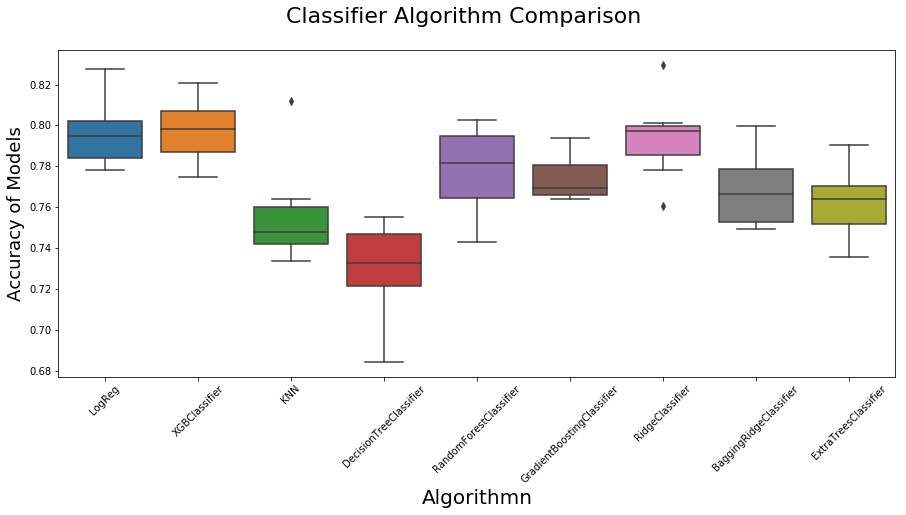

In [43]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, 
                                                                       n_estimators=1000))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [44]:
#MODEL FUNCTION

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm, X_train, y_train, 
          X_val, y_val, of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(X_train.values,y_train.values)
    predictions = algorithm.predict(X_val.values)
    
    print ("\naccuracy_score :",accuracy_score(y_val, predictions))
    
    print ("\nclassification report :\n",(classification_report(y_val, predictions)))
        
    plt.figure(figsize=(14,12))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_val, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds = roc_curve(y_val,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_, X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)

## Logistic Regression Prediction and Feature Importance

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************

accuracy_score : 0.8225691980127751

classification report :
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      1075
           1       0.64      0.59      0.61       334

    accuracy                           0.82      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.82      0.82      0.82      1409



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



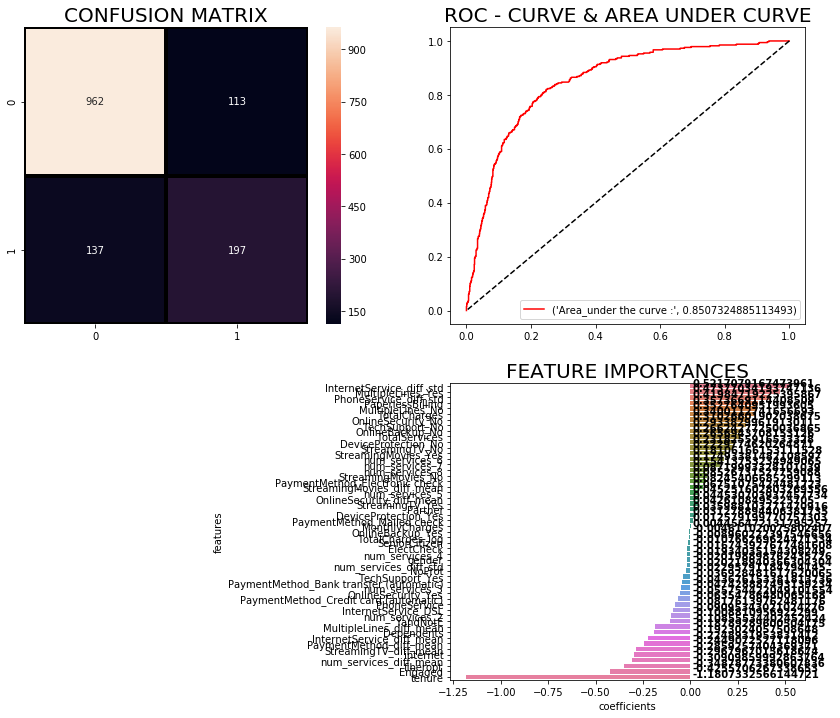

In [45]:
rf =LogisticRegression(solver = "lbfgs", multi_class = "auto")

model(rf,X_train, y_train,
      X_val, y_val, "coef")

## XGBClassifier 


accuracy_score : 0.8055358410220014

classification report :
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1075
           1       0.59      0.57      0.58       334

    accuracy                           0.81      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



Text(0.5, 1.0, 'CONFUSION MATRIX')

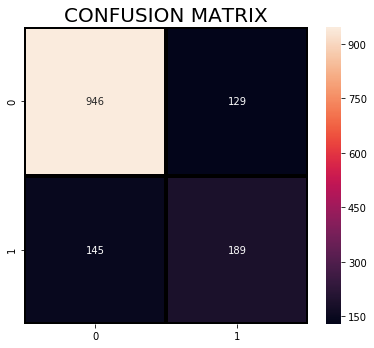

In [46]:
xgb = XGBClassifier(n_estimators=800, n_jobs=-1)

xgb.fit(X_train.values,y_train.values)
predictions = xgb.predict(X_val.values)

print ("\naccuracy_score :",accuracy_score(y_val, predictions))

print ("\nclassification report :\n",(classification_report(y_val, predictions)))

plt.figure(figsize=(14,12))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_val, predictions),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

## Random Forest Model and Feature Importances

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************

accuracy_score : 0.7970191625266146

classification report :
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1075
           1       0.58      0.54      0.56       334

    accuracy                           0.80      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.79      0.80      0.79      1409



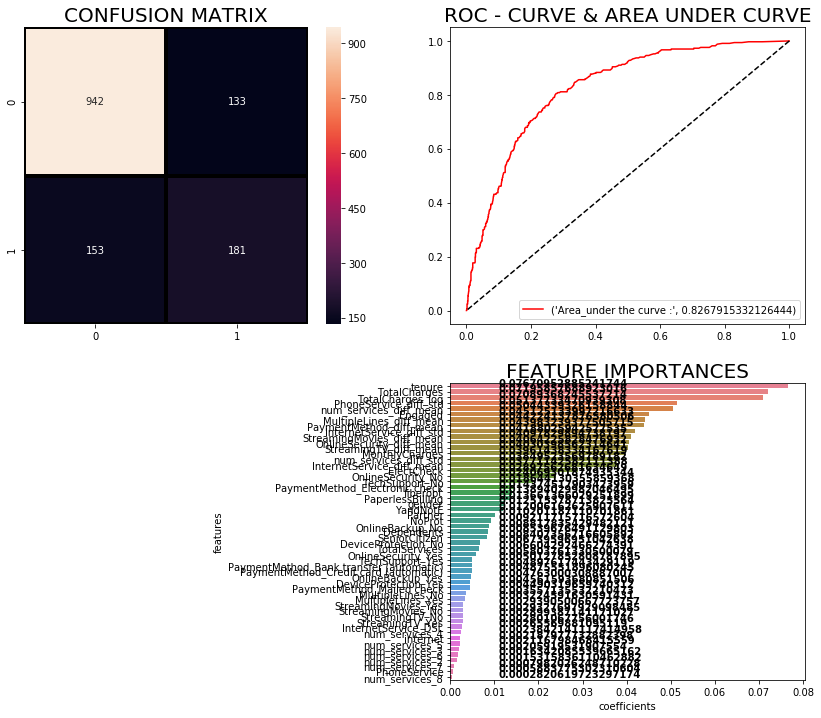

In [47]:
rf =RandomForestClassifier(n_estimators=500)

model(rf,X_train, y_train,
      X_val, y_val, "feat")

# NOTE: This kernel is not finished. If you think that it's useful, votes up the kernel 